<a href="https://colab.research.google.com/github/Reinaldo0/classificacao-titanic/blob/main/AtividadeBreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   mean radius  mean texture  mean perimeter  ...  worst symmetry  worst fractal dimension  target
0        17.99         10.38          122.80  ...          0.4601                  0.11890       0
1        20.57         17.77          132.90  ...          0.2750                  0.08902       0
2        19.69         21.25          130.00  ...          0.3613                  0.08758       0
3        11.42         20.38           77.58  ...          0.6638                  0.17300       0
4        20.29         14.34          135.10  ...          0.2364                  0.07678       0

[5 rows x 31 columns]
       mean radius  mean texture  ...  worst fractal dimension      target
count   569.000000    569.000000  ...               569.000000  569.000000
mean     14.127292     19.289649  ...                 0.083946    0.627417
std       3.524049      4.301036  ...                 0.018061    0.483918
min       6.981000      9.710000  ...                 0.055040    0.000000
25%     

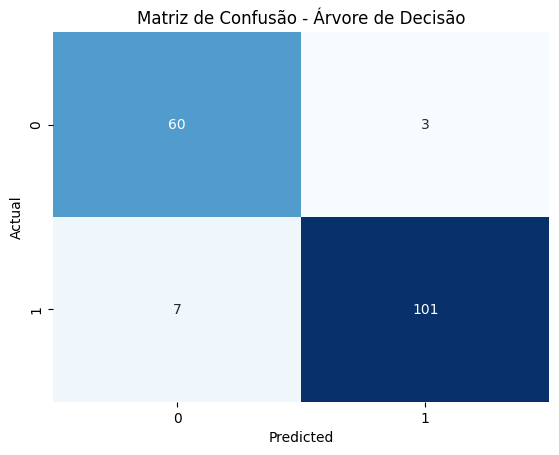

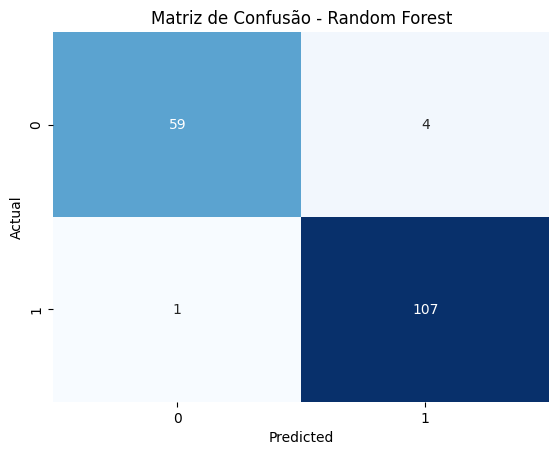

Classification Report - Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.97      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
# Importando as bibliotecas necessárias
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Função para carregar e explorar o dataset
def carregar_dados():
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    print(df.head())
    print(df.describe())

    # Contagem de casos malignos e benignos
    target_counts = df['target'].value_counts()
    print("\nContagem de Casos Malignos e Benignos: 0 = Maligno, 1 = Benigno")
    print(target_counts)
    print("\n--------")
    return df

# Função para pré-processamento dos dados
def preprocess_data(df):
    X = df.drop('target', axis=1)
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Verificação de valores nulos
    if df.isnull().sum().any():
        print("Existem valores nulos nos dados.")
    else:
        print("Nenhum valor nulo encontrado.")

    # Normalização
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Função para treinar modelos
def train_models(X_train, y_train):
    # Árvore de Decisão
    clf_tree = DecisionTreeClassifier(random_state=42)
    clf_tree.fit(X_train, y_train)

    # Random Forest
    clf_forest = RandomForestClassifier(random_state=42)
    clf_forest.fit(X_train, y_train)

    return clf_tree, clf_forest

# Função para calcular e exibir as métricas
def print_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

# Função para avaliar modelos
def evaluate_models(clf_tree, clf_forest, X_test, y_test):
    # Avaliação do modelo Árvore de Decisão
    print("Árvore de Decisão:")
    y_pred_tree = clf_tree.predict(X_test)
    print_metrics(y_test, y_pred_tree)

    # Avaliação do modelo Random Forest
    print("\nRandom Forest:")
    y_pred_forest = clf_forest.predict(X_test)
    print_metrics(y_test, y_pred_forest)

    return y_pred_tree, y_pred_forest

# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Função para gerar o classification report
def print_classification_report(y_test, y_pred, model_name):
    print(f"Classification Report - {model_name}:")
    print(classification_report(y_test, y_pred))

# Função principal para execução do pipeline
def main():
    # 1. Carregar e explorar o dataset
    df = carregar_dados()

    # 2. Pré-processamento dos dados
    X_train, X_test, y_train, y_test = preprocess_data(df)

    # 3. Treinar os modelos
    clf_tree, clf_forest = train_models(X_train, y_train)

    # 4. Avaliar os modelos
    y_pred_tree, y_pred_forest = evaluate_models(clf_tree, clf_forest, X_test, y_test)

    # 5. Matrizes de Confusão
    plot_confusion_matrix(y_test, y_pred_tree, "Matriz de Confusão - Árvore de Decisão")
    plot_confusion_matrix(y_test, y_pred_forest, "Matriz de Confusão - Random Forest")

    # 6. Classification Report
    print_classification_report(y_test, y_pred_tree, "Árvore de Decisão")
    print_classification_report(y_test, y_pred_forest, "Random Forest")

# Executar o pipeline
if __name__ == "__main__":
    main()
